In [1]:
import pandas as pd
import numpy as np

In [328]:
df_orig = pd.read_spss("./Data/private_landlord_survey/UKDA-8455-spss/spss/spss24/epls_2018_forarchive.sav")

In [235]:
df = df_orig
df = df[["serial_2", # Unique Identifier
        "LLCat1", # LL org category
        "LLeth2cat", # LL ethnicity
        "Age4cat", # LL Age
        "ValperPrpA", # Avg mkt val per prop
        "MktValgrpA", # Mkt val all props
        "BTL", # Buy to let loan/other
        "LnperPrpA", # Avg loan per prop
        "LnValgrpA", # Total val all loans
        "LTVgrpA", # LTV market val
        "TmLLgrpB", # How long been LL
        "LLExp", # Length experience as LL
        "NumPrpgrp", # How many props
        "RtIncgrpa", # Gross rental inc
        "LLIncgrpA", # Total LL inc no rent
        "TotIncgrp", # Total LL inc
        "RtPrIncgrpA", # Rent as prop. inc
        "Port_size", # Portfolio size
        "LLEmpl01", # Emp. Status: FT
        "LLEmpl02", # Emp. Status: PT
        "LLEmpl03", # Emp. Status: Self-employed as LL
        "LLEmpl04", # Emp. Status: Self-employed
        "LLEmpl05", # Emp. Status: Retired
        "LLEmpl06", # Emp. Status: Company director
        "LLEmpl07", # Emp. Status: Student
        "LLEmpl08", # Emp. Status: FT carer
        "LLEmpl09", # Emp. Status: Unemployed
        "LLOrg1", # LL Org: National LLs Assc.
        "LLOrg2", # LL Org: Residential LL Assc.
        "LLOrg3", # LL Org: Other professional
        "LLOrg4", # LL Org: None
        "AgOrg1", # Rental Org: ARLA
        "AgOrg2", # Rental Org: NAEA
        "AgOrg3", # Rental Org: NALS
        "AgOrg4", # Rental Org: UKALA
        "AgOrg5", # Rental Org: Other
        "AgOrg6", # Rental Org: None
        "Regprop01", # Prop Region: East England
        "Regprop02", # Prop Region: East Midlands
        "Regprop03", # Prop Region: Inner London
        "Regprop04", # Prop Region: Outer London
        "Regprop05", # Prop Region: North East
        "Regprop06", # Prop Region: North West
        "Regprop07", # Prop Region: South East
        "Regprop08", # Prop Region: South West
        "Regprop09", # Prop Region: West Midlands
        "Regprop10", # Prop Region: Yorkshire/Humber
        "LLInfo01", # Where info: Letting Agent
        "LLInfo02", # Where info: LL membership ass. or org
        "LLInfo03", # Where info: Online landlord forums/websites
        "LLInfo04", # Where info: Gov't websites
        "LLInfo05", # Where info: Family/friends
        "LLInfo06", # Where info: Online media
        "LLInfo07", # Where info: TV
        "LLInfo08", # Where info: Radio
        "LLInfo09", # Where info: Newspapers
        "AgtuseA1", # Agent use: For letting svcs
        "AgtuseA2", # Agent use: For mgmt svcs
        "AgtuseA3", # Agent use: None
        "FutVac", # Next Vacancy will relet
        "FutProp", # Next two years, plan
        "FutRLv1", # LL leave/reduce: Financial
        "FutRLv2", # LL leave/reduce: Personal
        "FutRLv3", # LL leave/reduce: Legislative
        "FutRLv4", # LL leave/reduce: Other
        "FutRLv5", # LL leave/reduce: None
        "FutRLv6", # LL leave/reduce: Don't Know
        "FutInc1", # LL Increase/maintain: Financial
        "FutInc2", # LL Increase/maintain: Personal
        "FutInc3", # LL Increase/maintain: Legislative
        "FutInc4", # LL Increase/maintain: Other
        "FutInc5", # LL Increase/maintain: None
        "FutInc6", # LL Increase/maintain: Don't know
        "LLPmb1", # LL Serious problems: Financial
        "LLPmb2", # LL Serious problems: Legislative
        "LLPmb3", # LL Serious problems: Tenant behaviour
        "LLPmb4", # LL Serious problems: Other
        "LLPmb5", # LL Serious problems: None
        "Lntyp1", # Current loan: B2L mort
        "Lntyp2", # Current loan: Commercial loan
        "Lntyp3", # Current loan: Family/friends
        "Lntyp4", # Current loan: No debt
        "Lntyp5", # Current loan: Other
        "TaxB201", # Awareness: Stamp duty increase
        "TaxB202", # Awareness: Reduced tax relief
        "TaxB203", # Awareness: Reduced CG tax non-prop
        "TaxB204", # Awareness: Change wear/tear allow
        "TaxB205", # Awareness: Change minimum rent B2L mort
        "TaxB206", # Awareness: Letting agent fee ban
        "TaxB207", # Awareness: Tax treatment foreign prop own
        "TaxB208", # Awareness: None
        "TaxB301", # As above but understanding
        "TaxB302",
        "TaxB303",
        "TaxB304",
        "TaxB305",
        "TaxB306",
        "TaxB307",
        "EPCEFG", # Any props. w/ EPC rating E, F or G
        "EPCE", # Awareness: EPC requirements
        "LetReq03"] # Requirement: EPC Certificate]
]

df["serial_2"] = df["serial_2"].astype("int")

In [198]:
def get_stats(df: pd.DataFrame, col: str, percent:bool = True) -> pd.DataFrame:
    df_stats = df[col].value_counts().to_frame()
    if percent == True:
        f = lambda a : round(a / len(df[df[col].notna()].index), 4)
        df_stats = df_stats.applymap(f)
    return df_stats

## Target Market identification

- Total market of LLs
    - Not corporate

In [7]:
for i in df['LLCat1'].unique():
    print(i)

As an individual or group of individuals
Other (please specify)
As part of a company
nan


In [19]:
tgt_mkt = df[(df["LLCat1"].isin(['As an individual or group of individuals', 'Other (please specify)']))]

In [20]:
tgt_len = len(tgt_mkt.index)
df_len = len(df[(df["LLCat1"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 6278 
 Total market: 6695 
 Percentage of total market: 93.77%


get_stats(tgt_mkt, "NumPrpgrp")

In [10]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4201
1 only,0.2391
5 to 9,0.2024
10 to 24,0.1100
25 to 100,0.0272
more than 100,0.0011


In [11]:
get_stats(tgt_mkt, "ValperPrpA")

,count
ValperPrpA,
"£200,000 to £499,999",0.4070
"£100,000 to £129,999",0.1439
"£150,000 to £179,999",0.1246
"£500,000 and over",0.0877
"£130,000 to £149,999",0.0609
"£80,000 to £99,999",0.0545
"£50,000 to £79,999",0.0527
"£180,000 to £199,999",0.0444
"up to £49,999",0.0242


In [14]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats

,count
MktValgrpA,
"£200,000 to £499,999",0.2931
"£500,000 to £999,999",0.2704
"£1,000,000 to £1,999,999",0.1702
"£100,000 to £199,999",0.1053
"£2,000,000 to £2,999,999",0.0581
"£6,000,000 or more",0.0284
"less than £100,000",0.0266
"£3,000,000 to £3,999,999",0.0253
"£4,000,000 to £4,999,999",0.0149


In [15]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats["medmktval"] = [
    (500000+999999)/2,
    (200000+499999)/2,
    (1000000+1999999)/2,
    (100000+199999)/2,
    (2000000+2999999)/2,
    (100000)/2,
    (3000000+3999999)/2,
    6000000,
    (4000000+4999999)/2,
    (5000000+5999999)/2
]

pd.DataFrame(df_stats["count"].multiply(df_stats["medmktval"])).sum()

0    1.086530e+06
dtype: float64

Note: LTV is as a proportion of market value of portfolio

In [21]:
tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])
tgt_mkt.loc[tgt_mkt["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"
df_stats = get_stats(tgt_mkt, "LTVgrpA")
df_stats

/tmp/ipykernel_3016/4196019641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])


,count
LTVgrpA,
0%,0.3657
50 to 59%,0.1115
60 to 69%,0.0950
40 to 49%,0.0870
30 to 39%,0.0710
20 to 29%,0.0630
70 to 79%,0.0575
1 to 9%,0.0482
10 to 19%,0.0473


## Estimates

Let's make estimates!
- NumPrpgrp
- ValperPrpA
- MktValgrpA
- LTVgrpA

Actually, let's do NumPrp from the mkt_val and valperprp!
Orig stats:
```
count    5787.000000
mean        0.227969
std         0.789743
min        -0.828571
25%        -0.113333
50%         0.073333
75%         0.400000
max        30.000000
```
Averaging a 22% difference from what we'd expect.

In [238]:
band_mapping = {
    '1 only': 1,
    '2 to 4': 3,
    '5 to 9': 7,
    '10 to 24': 17,
    '25 to 100': 62,
    'more than 100': 150
}

df['NumPrpgrp_estimated'] = df['NumPrpgrp'].map(band_mapping)

In [239]:
band_mapping = {
    'up to £49,999': 25000,
    '£50,000 to £79,999': 65000,
    '£80,000 to £99,999': 90000,
    '£100,000 to £129,999': 115000,
    '£130,000 to £149,999': 140000,
    '£150,000 to £179,999': 165000,
    '£180,000 to £199,999': 190000,
    '£200,000 to £499,999': 350000,
    '£500,000 and over': 600000
}
df['ValperPrpA_estimated'] = df['ValperPrpA'].map(band_mapping)

In [240]:
band_mapping = {
    'less than £100,000': 50000,
    '£100,000 to £199,999': 150000,
    '£200,000 to £499,999': 350000,
    '£500,000 to £999,999': 750000,
    '£1,000,000 to £1,999,999': 1500000,
    '£2,000,000 to £2,999,999': 2500000,
    '£3,000,000 to £3,999,999': 3500000,
    '£4,000,000 to £4,999,999': 4500000,
    '£5,000,000 to £5,999,999': 5500000,
    '£6,000,000 or more': 7000000
}
df['MktValgrpA_estimated'] = df['MktValgrpA'].map(band_mapping)

In [241]:
df["LTVgrpA"] = df.LTVgrpA.cat.add_categories(['0%'])
df.loc[df["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"

band_mapping = {
    '0%': 0,
    '1 to 9%': 0.05,
    '10 to 19%': 0.15,
    '20 to 29%': 0.25,
    '30 to 39%': 0.35,
    '40 to 49%': 0.45,
    '50 to 59%': 0.55,
    '60 to 69%': 0.65,
    '70 to 79%': 0.75,
    '80 to 89%': 0.85,
    '90 to 99%': 0.95,
    '100 and above': 1.0
}

df['LTVgrpA_estimated'] = df['LTVgrpA'].map(band_mapping)

The below box drastically improves our estimates:
```
count    5787.000000
mean        0.121419
std         0.227355
min         0.000000
25%         0.010000
50%         0.066667
75%         0.080000
max         1.000000
```
a 12% difference: that's fantastic.

In [252]:
df['ValperPrpA_estimated'] = pd.to_numeric(df['ValperPrpA_estimated'], errors='coerce')
df['MktValgrpA_estimated'] = pd.to_numeric(df['MktValgrpA_estimated'], errors='coerce')

df = df[df['MktValgrpA_estimated'].notna()]
df = df[df['ValperPrpA_estimated'].notna()]

df['Num_prp_estimated'] = (df['MktValgrpA_estimated'] / df['ValperPrpA_estimated']).astype(int)
df.loc[df['NumPrpgrp'] == '1 only', 'Num_prp_estimated'] = 1

In [254]:
df['Num_prp_estimated'] = pd.to_numeric(df['Num_prp_estimated'], errors='coerce')

df['mkt_val_est_result'] = df['ValperPrpA_estimated'] * df['Num_prp_estimated']
df['mkt_val_difference'] = (df['mkt_val_est_result'] - df['MktValgrpA_estimated']) / df['MktValgrpA_estimated']

In [255]:
df['LTVgrpA_estimated'] = pd.to_numeric(df['LTVgrpA_estimated'], errors='coerce')

df['Debt_estimated'] = df['LTVgrpA_estimated'] * df['mkt_val_est_result']

In [256]:
df['mkt_val_difference'].describe()

count    5787.000000
mean       -0.051154
std         0.133232
min        -0.828571
25%        -0.066667
50%        -0.057143
75%        -0.003333
max         0.800000
Name: mkt_val_difference, dtype: float64

In [257]:
df['NumPrpgrp_estimated'] = pd.to_numeric(df['NumPrpgrp_estimated'], errors='coerce')
df['num_prp_difference'] = (df['Num_prp_estimated'] - df['NumPrpgrp_estimated']) / df['NumPrpgrp_estimated']

Estimating SDLT:

In [259]:
def calculate_stlt(prop_val, num_prps):
    if prop_val <= 250_000:
        sdlt = prop_val * 0.03
    elif prop_val <= 925_000:
        sdlt = 250_000 * 0.03 + \
            (prop_val - 250_000) * 0.08
    elif prop_val <= 1_500_000:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            (prop_val - 925_000) * 0.13
    else:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            925_000 * 0.13 + \
            (prop_val - 1_500_000) * 0.15
    
    sdlt_total = sdlt * num_prps
    
    return sdlt_total

In [260]:
df['sdlt_estimated'] = df.apply(lambda row: calculate_stlt(row['Num_prp_estimated'], row['ValperPrpA_estimated']), axis=1)

Estimating capital gains.
>only 62 non-corporate landlords are missing these values- from a set of ~5700, that's not a terrible loss.

- Start by averaging each band
- This will give us a fixed number of years for each LL: can manually calc. est'd appreciation
- Once we have this, we can map est'd appreciation to `CapGainsPc_estimated`
- Finally, just get a figure for total cap gains multiped `0.28` and the number of props for `CGT_estimated`.

I made this a bit more difficult: the `lambda` function below is a polynomial pulled from a spreadsheet of UK HPI from 1996. We get an approximation of CG from the first property, then spread out the others for each year and average the resulting CG to find CGT.

`TmLLGrpB`

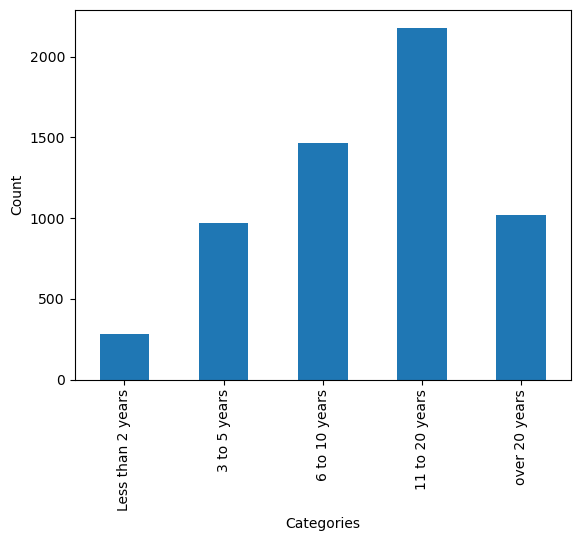

In [132]:
import matplotlib.pyplot as plt

desired_order = [
    'Less than 2 years', 
    '3 to 5 years',
    '6 to 10 years', 
    '11 to 20 years', 
    'over 20 years', 
    ]

df['TmLLgrpB'].value_counts().reindex(desired_order).plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [263]:
years_owned = {
    'Less than 2 years': 1,  # 1 year, assuming an average of 1 year
    '3 to 5 years': 3,  # 3 years, skewed lower from 4 years
    '6 to 10 years': 7,  # 7 years, skewed lower from 8 years
    '11 to 20 years': 13,  # 13 years, skewed lower from 15 years
    'over 20 years': 20,  # 22 years, skewed lower from 25 years
    }

# years_owned = {
#     'Less than 2 years': 0.043,  # 1 year, assuming an average of 1 year
#     '3 to 5 years': 0.178,  # 3 years, skewed lower from 4 years
#     '6 to 10 years': 0.342,  # 7 years, skewed lower from 8 years
#     '11 to 20 years': 0.491,  # 13 years, skewed lower from 15 years
#     'over 20 years': 2.969,  # 22 years, skewed lower from 25 years
#     }

df['YearsOwned_estimated'] = df['TmLLgrpB'].map(years_owned)
df['YearsOwned_estimated'] = pd.to_numeric(df['YearsOwned_estimated'], errors='coerce')
df['PrpsPerYear'] = df['Num_prp_estimated'] / df['YearsOwned_estimated']

In [356]:
def est_cap_gains(years_owned, num_prps, mkt_val):
    cg = lambda x : (-0.0006 * x ** 3 + 0.0314 * x ** 2 - 0.5628 * x + 3.7054) + 1
    
    cg_amts = []
    years_per_prp = years_owned / num_prps
    current_yr = years_per_prp
    
    cg_amts.append(cg(24 - years_owned))
    
    if num_prps > 1:
        for i in range(num_prps - 1):
            cg_amts.append(cg(current_yr))
            current_yr += years_per_prp
    
    cg_avg = sum(cg_amts) / len(cg_amts)
    
    orig_mkt = mkt_val / (cg_avg)
    cg_total = round(max(0, mkt_val - orig_mkt) * 0.28, 2)
    
    
    return cg_avg - 1, cg_avg, orig_mkt, cg_total
    
        
    
est_cap_gains(15, 50, 2450000.0)

(1.3082544999999999, 2.3082545, 1061408.0899658161, 388805.73)

In [269]:
df['cg_estimated'] = df.apply(lambda row: est_cap_gains(row['YearsOwned_estimated'], row['Num_prp_estimated'], row['mkt_val_est_result']), axis=1)

In [358]:
df['total_lending'] = df['Debt_estimated'].fillna(0) + df['sdlt_estimated'].fillna(0) + df['cg_estimated'].fillna(0)

Putting the important vars into a new df

In [374]:
df_test = df[[
    'LLCat1',
    'TmLLgrpB',
    # 'LTVgrpA',
    'LTVgrpA_estimated',
    'Debt_estimated',
    # 'NumPrpgrp',
    # 'NumPrpgrp_estimated',
    'Num_prp_estimated',
    # 'ValperPrpA',
    'ValperPrpA_estimated',
    # 'MktValgrpA',
    # 'MktValgrpA_estimated',
    'mkt_val_est_result',
    # 'mkt_val_difference',
    'sdlt_estimated',
    'cg_estimated',
    'total_lending',
]]

In [375]:
df_test = df_test[df['mkt_val_difference'].notna()]
df_test['Debt_estimated'] = df_test['Debt_estimated'].fillna(0)

In [376]:
df_test.sample(5)

,LLCat1,TmLLgrpB,LTVgrpA_estimated,Debt_estimated,Num_prp_estimated,ValperPrpA_estimated,mkt_val_est_result,sdlt_estimated,cg_estimated,total_lending
6098,As an individual or group of individuals,over 20 years,0.15,1050000.0,20,350000.0,7000000.0,210000.0,1018868.72,2278868.72
7479,As an individual or group of individuals,11 to 20 years,0.25,350000.0,4,350000.0,1400000.0,42000.0,210954.11,602954.11
316,As an individual or group of individuals,3 to 5 years,0.55,379500.0,6,115000.0,690000.0,20700.0,137816.11,538016.11
5989,As an individual or group of individuals,6 to 10 years,0.75,427500.0,3,190000.0,570000.0,17100.0,96088.38,540688.38
2488,As an individual or group of individuals,11 to 20 years,0.35,490000.0,4,350000.0,1400000.0,42000.0,210954.11,742954.11


## New Tgt Market

In [378]:
tgt_mkt = df_test[(df_test["LLCat1"].isin(['As an individual or group of individuals', 'Other (please specify)']))]
tgt_len = len(tgt_mkt.index)
df_len = len(df_test[(df_test["LLCat1"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 5449 
 Total market: 5787 
 Percentage of total market: 94.16%


In [363]:
tgt_mkt_prps = tgt_mkt['Num_prp_estimated'].sum()
mkt_prps = df['Num_prp_estimated'].sum()

print(f" Target market: {tgt_mkt_prps} \n Total market: {mkt_prps} \n Percentage of total market: {round((tgt_mkt_prps/mkt_prps)*100,2)}%")

 Target market: 27181 
 Total market: 32286 
 Percentage of total market: 84.19%


In [339]:
tgt_mkt_val = tgt_mkt['mkt_val_est_result'].sum()
mkt_val = df_test['mkt_val_est_result'].sum()

print(f" Target market: {tgt_mkt_val} \n Total market: {mkt_val} \n Percentage of total market: {round((tgt_mkt_val/mkt_val)*100,2)}%")

 Target market: 5759930000.0 
 Total market: 6596535000.0 
 Percentage of total market: 87.32%


In [365]:
available_lending = tgt_mkt['total_lending'].sum()

available_lending

2825435030.45

In [371]:
available_lending / 5449

518523.5878968618

In [379]:
tgt_mkt.sort_values(by='total_lending', ascending=False).head(20)

,LLCat1,TmLLgrpB,LTVgrpA_estimated,Debt_estimated,Num_prp_estimated,ValperPrpA_estimated,mkt_val_est_result,sdlt_estimated,cg_estimated,total_lending
6511,As an individual or group of individuals,11 to 20 years,0.85,5865000.0,60,115000.0,6900000.0,207000.0,1147570.83,7219570.83
6954,As an individual or group of individuals,6 to 10 years,0.75,5250000.0,20,350000.0,7000000.0,210000.0,1326003.38,6786003.38
7176,As an individual or group of individuals,3 to 5 years,1.00,5405000.0,47,115000.0,5405000.0,162150.0,1124562.49,6691712.49
6583,As an individual or group of individuals,11 to 20 years,0.75,5250000.0,20,350000.0,7000000.0,210000.0,1148978.00,6608978.00
2855,As an individual or group of individuals,11 to 20 years,0.75,5250000.0,20,350000.0,7000000.0,210000.0,1148978.00,6608978.00
6535,As an individual or group of individuals,11 to 20 years,0.75,5197500.0,42,165000.0,6930000.0,207900.0,1149344.90,6554744.90
6403,As an individual or group of individuals,over 20 years,0.75,5250000.0,50,140000.0,7000000.0,210000.0,1013571.70,6473571.70
6699,As an individual or group of individuals,11 to 20 years,0.65,4550000.0,20,350000.0,7000000.0,210000.0,1148978.00,5908978.00
4537,As an individual or group of individuals,11 to 20 years,0.65,4550000.0,20,350000.0,7000000.0,210000.0,1148978.00,5908978.00
6928,As an individual or group of individuals,11 to 20 years,0.65,4550000.0,20,350000.0,7000000.0,210000.0,1148978.00,5908978.00


In [369]:
2825435030 / 0.005

565087006000.0

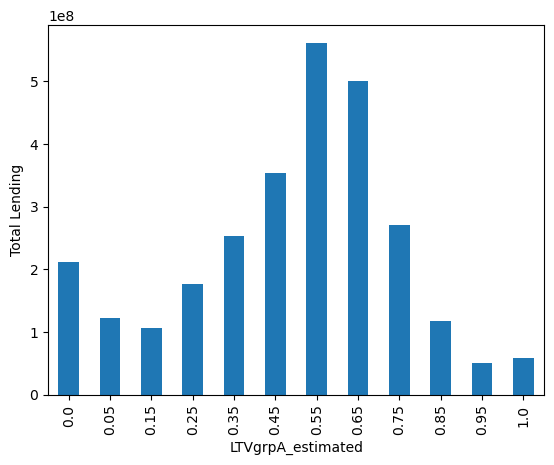

In [383]:
import matplotlib.pyplot as plt

df['LTVgrpA_estimated'] = pd.to_numeric(df['LTVgrpA_estimated'], errors='coerce')

# assuming df is your DataFrame and it's already defined
tgt_grouped = tgt_mkt.groupby('LTVgrpA_estimated')['total_lending'].sum().reset_index()

# sort dataframe by 'LTVgrpA_estimated' for a better visualization
tgt_grouped = tgt_grouped.sort_values(by='LTVgrpA_estimated')

tgt_grouped.plot(kind='bar', x='LTVgrpA_estimated', y='total_lending', legend=None)

# plt.xlabel('Estimated Number of Properties')
plt.ylabel('Total Lending')
# plt.title('Total Lending by Estimated Number of Properties')
plt.show()


In [384]:
tgt_grouped

,LTVgrpA_estimated,total_lending
0,0.00,2.116387e+08
1,0.05,1.221726e+08
2,0.15,1.064676e+08
3,0.25,1.771430e+08
4,0.35,2.533968e+08
5,0.45,3.533204e+08
6,0.55,5.616129e+08
7,0.65,5.003245e+08
8,0.75,2.711129e+08
9,0.85,1.177665e+08
